In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results.csv")
df['time'] = df['time'] - df['time'].iloc[0]

In [2]:
df

,name,time,memory_gpu_0,max_memory_gpu_0,memory_gpu_1,max_memory_gpu_1
0,start,0.000000,1.132998,1.133001,0.875064,0.875066
1,start forward,0.067667,0.759525,1.132999,0.509525,0.875065
2,full top k index,0.069773,0.760014,0.760016,0.510014,0.510016
3,final hidden states,0.071319,0.885015,0.885017,0.635015,0.635017
4,sort global ranks,0.100565,0.885748,0.886497,0.635748,0.636497
5,need indicies,0.104857,0.885909,0.886343,0.635835,0.636195
6,local sorted ranks,0.106126,0.886154,0.886533,0.636080,0.636459
7,bincount,0.127845,0.886155,0.886158,0.636081,0.636084
8,recv counts,0.129033,0.886157,0.886159,0.636083,0.636085
9,counts.tolist,0.133034,0.886157,0.886295,0.636083,0.636221


In [3]:
single = [3.389] * len(df)

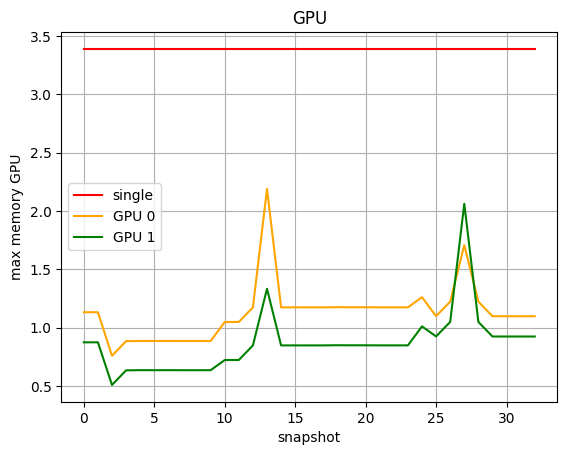

In [ ]:
plt.plot(single, label='single', color='red')
plt.plot(df['max_memory_gpu_0'], label='GPU 0', color='orange')
plt.plot(df['max_memory_gpu_1'], label='GPU 1', color='green')
plt.title('GPU')
plt.xlabel('snapshot')
plt.ylabel('max memory GPU with parallelism vs single')
plt.legend()
plt.grid(True)
plt.show()

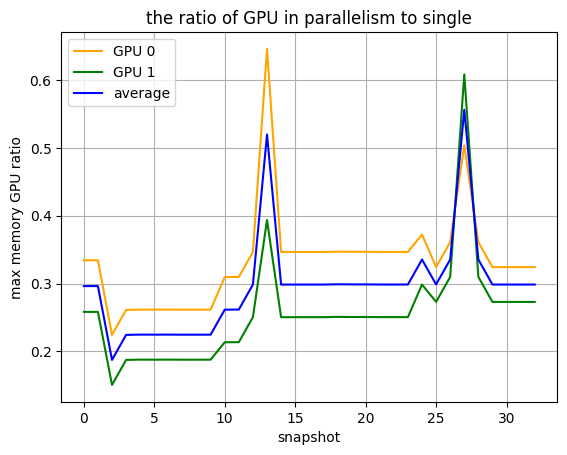

In [10]:
ratio_gpu_0 = [p / s for p, s in zip(df['max_memory_gpu_0'], single)]
ratio_gpu_1 = [p / s for p, s in zip(df['max_memory_gpu_1'], single)]
ratio_average = [(p1 + p2) / (2*s) for p1, p2, s in zip(df['max_memory_gpu_0'], df['max_memory_gpu_1'], single)]
plt.plot(ratio_gpu_0, label='GPU 0', color='orange')
plt.plot(ratio_gpu_1, label='GPU 1', color='green')
plt.plot(ratio_average, label='average', color='blue')
plt.title('the ratio of GPU in parallelism to single')
plt.xlabel('snapshot')
plt.ylabel('max memory GPU ratio')
plt.legend()
plt.grid(True)
plt.show()

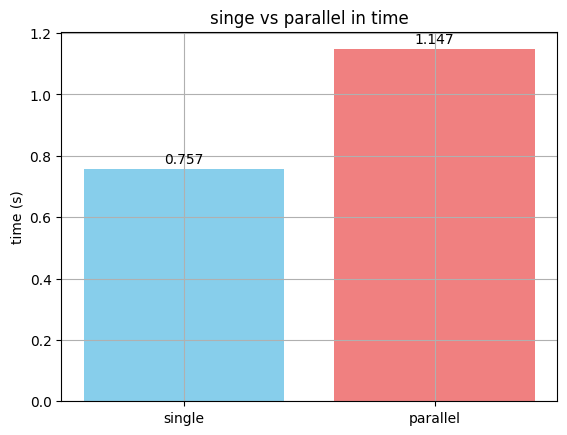

In [11]:
values = [0.757, 1.147]

bars = plt.bar(['single', 'parallel'], values, color=['skyblue', 'lightcoral'])
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')
    
plt.title('singe vs parallel in time')
plt.ylabel('time (s)')
plt.grid(True)
plt.show()